# Libraries

In [98]:
# tensorflow utils
import tensorflow as tf

# matplotlib utils
import matplotlib as mpl
import matplotlib.pyplot as plt

# other utils
import numpy as np
import pandas as pd
import seaborn as sn

# local assets
import layers

# local config
mpl.rcParams['font.family'] = 'monospace'

# Test :: Classic MNIST

## Datasets

In [99]:
( (p_images, p_labels),
  (q_images, q_labels), ) = tf.keras.datasets.mnist.load_data()

# normalize
p_images = p_images / 255.0
q_images = q_images / 255.0

## Model

In [100]:
model = tf.keras.models.load_model('../models/std/classic_mnist.keras')

## Visualize

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.9746 - loss: 0.0890
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.9578 - loss: 0.1438
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9007 - loss: 0.3335
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.8051 - loss: 0.7494
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.7189 - loss: 1.2987
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.6514 - loss: 1.9101
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step


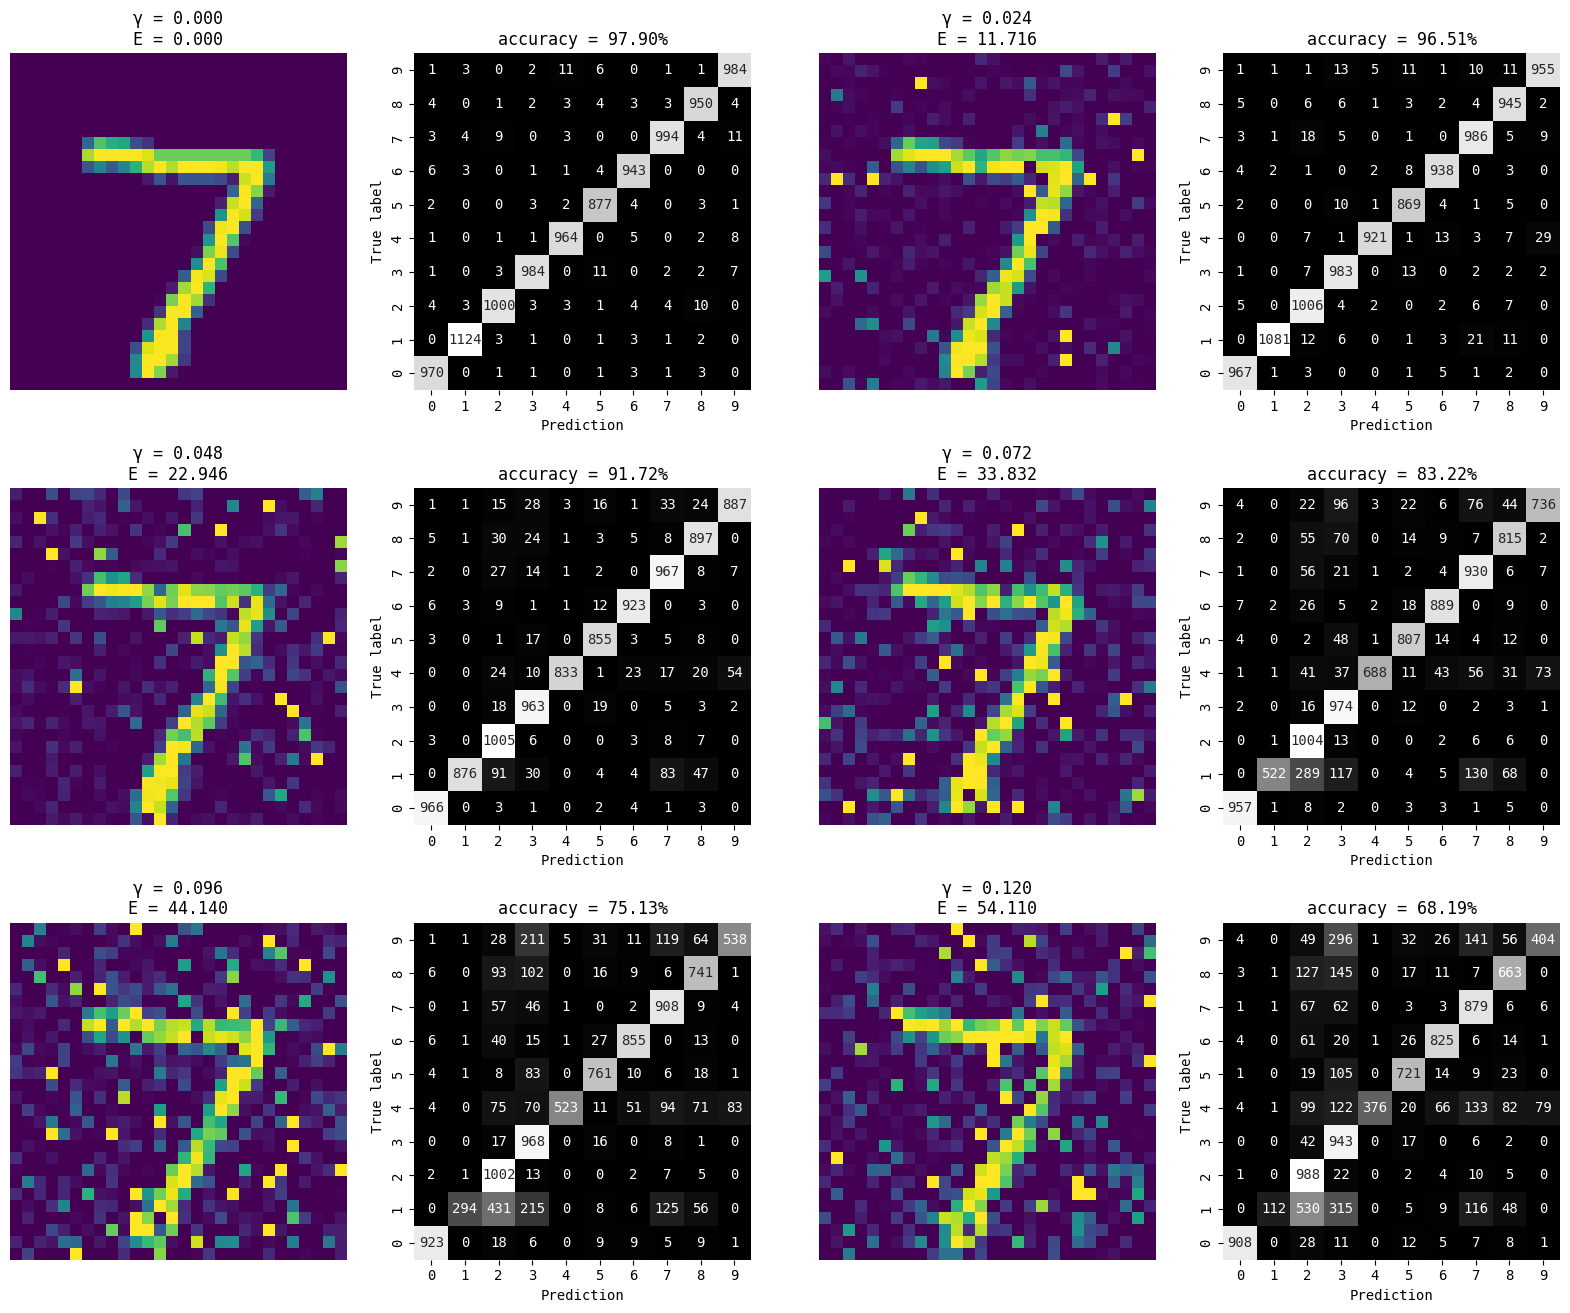

In [101]:
plt.figure(figsize=(20, 16))

noise_x = []
noise_y1 = []
noise_y2 = []

i = 0

for noise_lvl in np.linspace(0, .12, num=6):
    q_noised = layers.CauchyNoiseLayer(amplify=noise_lvl)(q_images)
    
    # evaluation
    noise_acc = model.evaluate(q_noised, q_labels)[1]
    noise_ene = ((q_images - q_noised) ** 2).numpy().sum() / q_images.shape[0]

    # prediction & confusion
    q_pred = model.predict(q_noised).argmax(-1)
    q_conf = tf.math.confusion_matrix(q_labels, q_pred)
    
    # statistics
    noise_x.append(noise_lvl)
    noise_y1.append(noise_ene)
    noise_y2.append(noise_acc)

    # visualize distorted image
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.title(f'γ = {noise_lvl:.3f}\nΕ = {noise_ene:.3f}')
    plt.imshow(q_noised[0])

    # visualize confusion matrix
    plt.subplot(3, 4, i + 2)
    sn.heatmap(pd.DataFrame(q_conf), annot=True, cbar=False, cmap='gist_gray', fmt='g', square=True).invert_yaxis()
    plt.title(f'accuracy = {noise_acc:.2%}')
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    
    # increment
    i = i + 2

plt.show()

## Conceive

<Figure size 640x480 with 0 Axes>

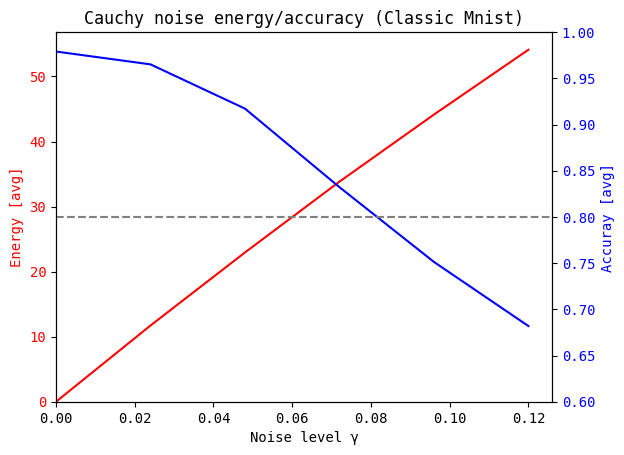

In [102]:
plt.figure()

ax1 = plt.subplots()[1]
ax2 = ax1.twinx()

# X / Y1
ax1.set_title('Cauchy noise energy/accuracy (Classic Mnist)')
ax1.set_xlabel('Noise level γ')
ax1.set_ylabel('Energy [avg]', color='red')
ax1.plot(noise_x, noise_y1, color='red')
ax1.tick_params(axis ='y', labelcolor='red')
ax1.set_xlim(0)
ax1.set_ylim(0)

# X / Y2
ax2.set_ylabel('Accuray [avg]', color='blue')
ax2.plot(noise_x, noise_y2, color='blue')
ax2.tick_params(axis ='y', labelcolor='blue')
ax2.hlines(y=0.8, xmin=0, xmax=1, linestyle='--', color='gray')
ax2.set_ylim(0.6, 1)

plt.show()

# Test :: Fashion MNIST

## Datasets

In [103]:
( (p_images, p_labels),
  (q_images, q_labels), ) = tf.keras.datasets.fashion_mnist.load_data()

# normalize
p_images = p_images / 255.0
q_images = q_images / 255.0

## Model

In [104]:
model = tf.keras.models.load_model('../models/std/fashion_mnist.keras')

## Visualize

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9218 - loss: 0.2249
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8979 - loss: 0.2899
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8462 - loss: 0.4186
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7728 - loss: 0.6319
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6933 - loss: 0.8766
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6241 - loss: 1.1648
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


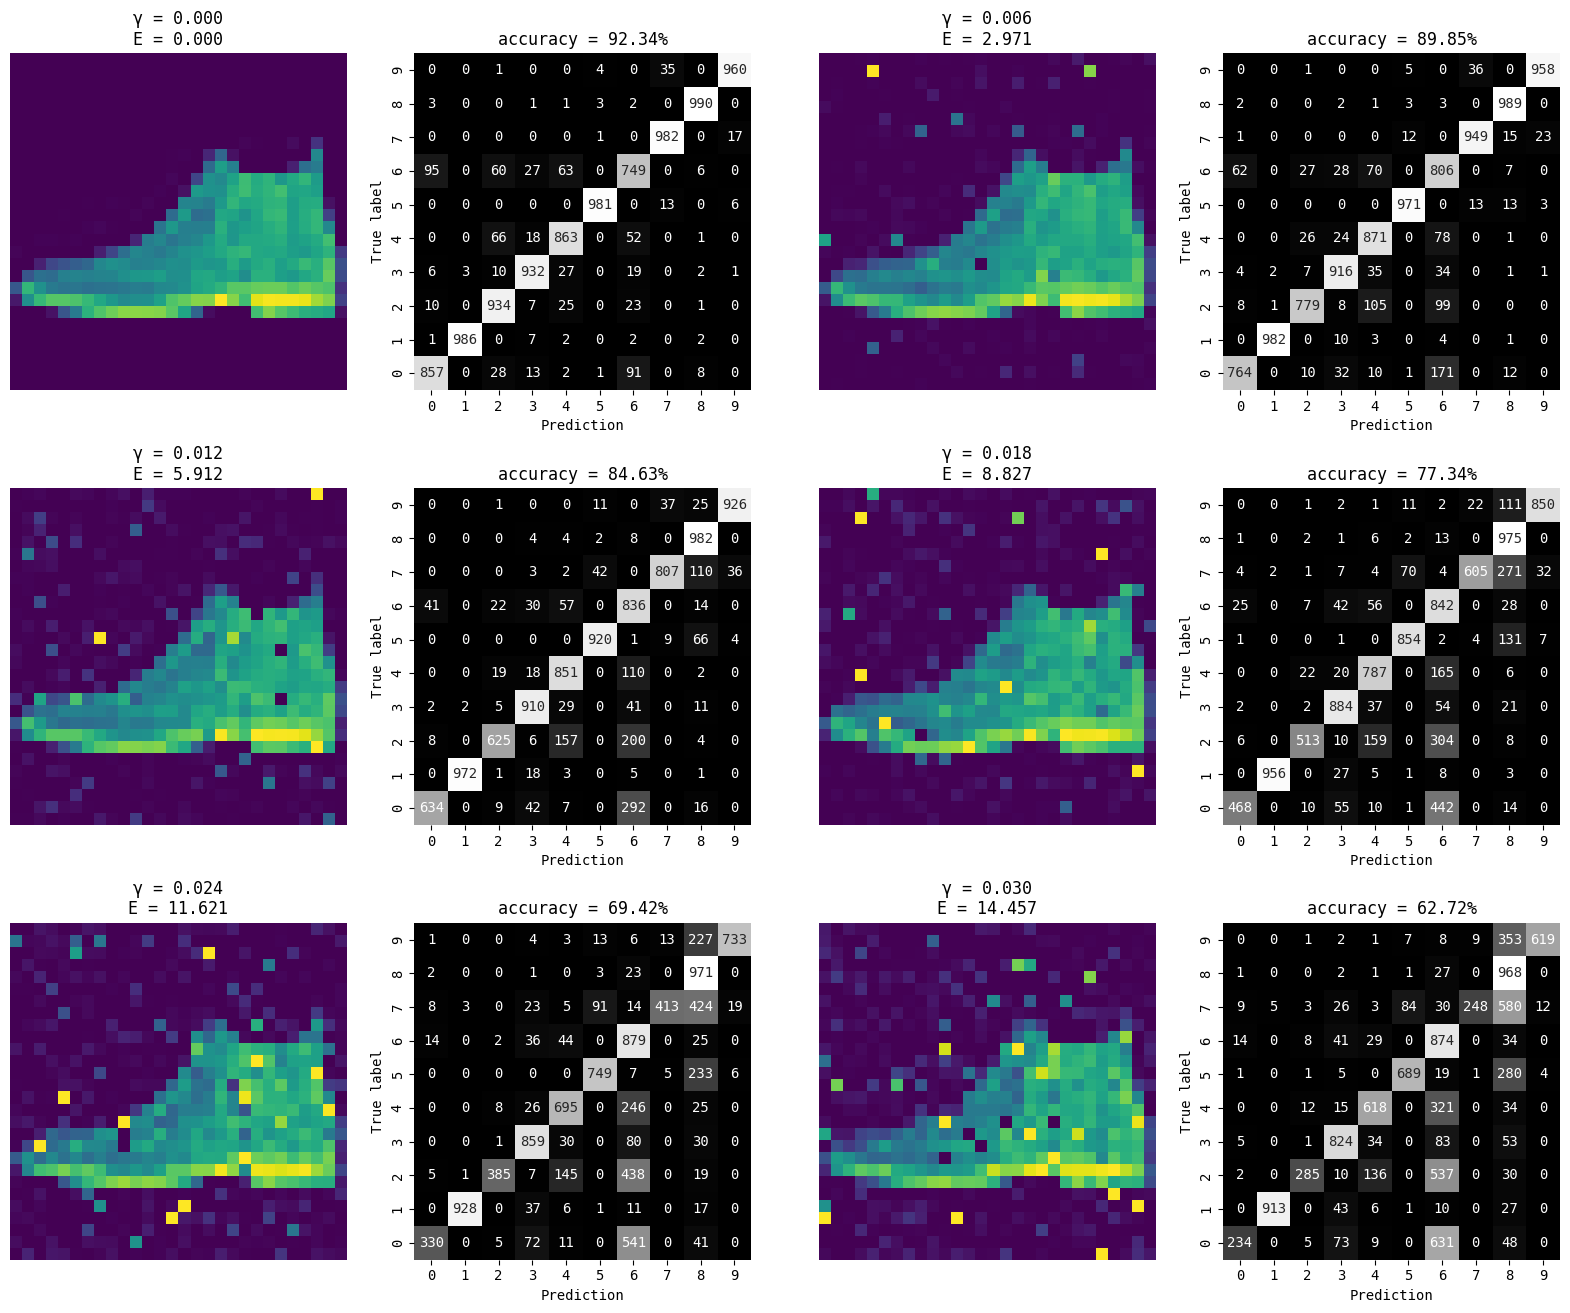

In [105]:
plt.figure(figsize=(20, 16))

noise_x = []
noise_y1 = []
noise_y2 = []

i = 0

for noise_lvl in np.linspace(0, .03, num=6):
    q_noised = layers.CauchyNoiseLayer(amplify=noise_lvl)(q_images)
    
    # evaluation
    noise_acc = model.evaluate(q_noised, q_labels)[1]
    noise_ene = ((q_images - q_noised) ** 2).numpy().sum() / q_images.shape[0]

    # prediction & confusion
    q_pred = model.predict(q_noised).argmax(-1)
    q_conf = tf.math.confusion_matrix(q_labels, q_pred)
    
    # statistics
    noise_x.append(noise_lvl)
    noise_y1.append(noise_ene)
    noise_y2.append(noise_acc)

    # visualize distorted image
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.title(f'γ = {noise_lvl:.3f}\nΕ = {noise_ene:.3f}')
    plt.imshow(q_noised[0])

    # visualize confusion matrix
    plt.subplot(3, 4, i + 2)
    sn.heatmap(pd.DataFrame(q_conf), annot=True, cbar=False, cmap='gist_gray', fmt='g', square=True).invert_yaxis()
    plt.title(f'accuracy = {noise_acc:.2%}')
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    
    # increment
    i = i + 2

plt.show()

## Conceive

<Figure size 640x480 with 0 Axes>

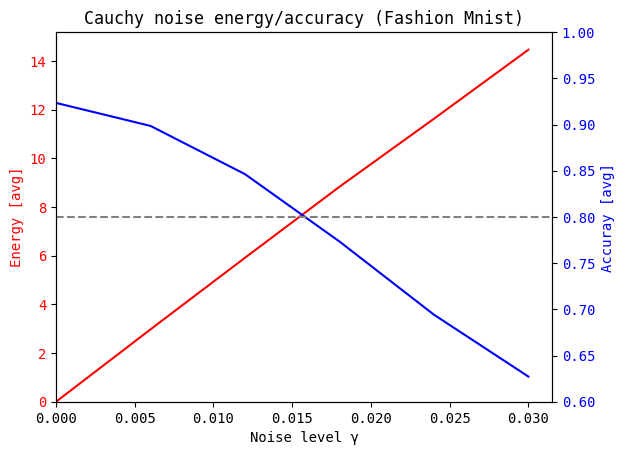

In [106]:
plt.figure()

ax1 = plt.subplots()[1]
ax2 = ax1.twinx()

# X / Y1
ax1.set_title('Cauchy noise energy/accuracy (Fashion Mnist)')
ax1.set_xlabel('Noise level γ')
ax1.set_ylabel('Energy [avg]', color='red')
ax1.plot(noise_x, noise_y1, color='red')
ax1.tick_params(axis ='y', labelcolor='red')
ax1.set_xlim(0)
ax1.set_ylim(0)

# X / Y2
ax2.set_ylabel('Accuray [avg]', color='blue')
ax2.plot(noise_x, noise_y2, color='blue')
ax2.tick_params(axis ='y', labelcolor='blue')
ax2.hlines(y=0.8, xmin=0, xmax=1, linestyle='--', color='gray')
ax2.set_ylim(0.6, 1)

plt.show()